In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras.preprocessing import image

import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from skimage import transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.optimizers import Adam
import seaborn as sns





In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest"
)

valid_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest"
)


test_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest"
)

In [ ]:
train_dataset=train_datagen.flow_from_directory("/content/drive/MyDrive/Deep_Learning /Projects/Betel_Leaf_Disease_Classification/Training/Betel_Leaf_D/train",
                                                target_size=(300,300),
                                                color_mode="rgb",
                                                class_mode="categorical",
                                                batch_size=80,
                                                )

test_dataset=test_datagen.flow_from_directory("/content/drive/MyDrive/Deep_Learning /Projects/Betel_Leaf_Disease_Classification/Training/Betel_Leaf_D/test",
                                                target_size=(300,300),
                                                color_mode="rgb",
                                                class_mode="categorical",
                                                batch_size=80,
                                                shuffle=False
                                                )


valid_dataset=valid_datagen.flow_from_directory("/content/drive/MyDrive/Deep_Learning /Projects/Betel_Leaf_Disease_Classification/Training/Betel_Leaf_D/val",
                                                target_size=(300,300),
                                                color_mode="rgb",
                                                class_mode="categorical",
                                                batch_size=80,
                                                )

Found 1377 images belonging to 5 classes.
Found 278 images belonging to 5 classes.
Found 183 images belonging to 5 classes.


**VGG 19 Model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout


def VGG19(input_shape=(300, 300, 3), num_classes=5):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers with dropout
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(inputs=input_layer, outputs=output, name='vgg19')
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

vgg19_model = VGG19()

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
LEARNING_RATE=0.001
vgg19_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=['accuracy']

)
Info1 = vgg19_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
)

Epoch 1/20
18/18 [==============================] - 512s 24s/step - loss: 64.9026 - accuracy: 0.2229 - val_loss: 1.5918 - val_accuracy: 0.2186
Epoch 2/20
18/18 [==============================] - 126s 7s/step - loss: 1.5930 - accuracy: 0.2404 - val_loss: 1.5904 - val_accuracy: 0.2514
Epoch 3/20
18/18 [==============================] - 117s 6s/step - loss: 1.5938 - accuracy: 0.2484 - val_loss: 1.5898 - val_accuracy: 0.2514
Epoch 4/20
18/18 [==============================] - 125s 7s/step - loss: 1.5925 - accuracy: 0.2505 - val_loss: 1.5895 - val_accuracy: 0.2514
Epoch 5/20
18/18 [==============================] - 122s 7s/step - loss: 1.5901 - accuracy: 0.2505 - val_loss: 1.5890 - val_accuracy: 0.2514
Epoch 6/20
18/18 [==============================] - 126s 7s/step - loss: 1.5911 - accuracy: 0.2505 - val_loss: 1.7848 - val_accuracy: 0.2022
Epoch 7/20
18/18 [==============================] - 122s 7s/step - loss: 1.6061 - accuracy: 0.2498 - val_loss: 1.5896 - val_accuracy: 0.2514
Epoch 8/20


In [ ]:
import matplotlib.pyplot as plt

<ipython-input-11-50d6d39fc2ad>:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax[i].legend('train','val')


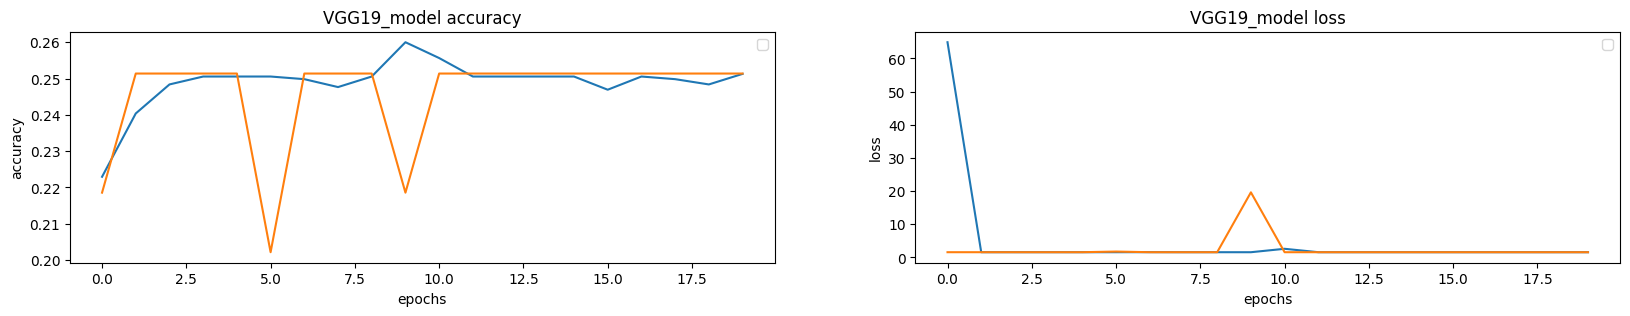

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(20,3))
ax=ax.ravel()

for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(Info1.history[met])
    ax[i].plot(Info1.history['val_'+ met])
    ax[i].set_title('VGG19_model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend('train','val')







In [ ]:
predictions1=vgg19_model.predict(test_dataset)

4/4 [==============================] - 89s 27s/step


In [ ]:
diseases_labels=[]

In [ ]:
for key, value in train_dataset.class_indices.items():
  diseases_labels.append(key)

print(diseases_labels)


['Healthy_Betel_Vine', 'Healthy_Leaf', 'Miscellaneous', 'Rot_Disease', 'Spot_Disease']


In [ ]:
def evaluate(actual, predictions1):
  pre1=[]
  for i in predictions1:
    pre1.append(np.argmax(i))
  accuracy=(pre1==actual).sum()/actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ =precision_recall_fscore_support(actual, pre1, average='macro')
  print(f'precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1score: {f1_score}')





evaluate(test_dataset.classes, predictions1)




Accuracy: 0.24820143884892087
precision: 0.04964028776978417
Recall: 0.2
F1score: 0.07953890489913545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


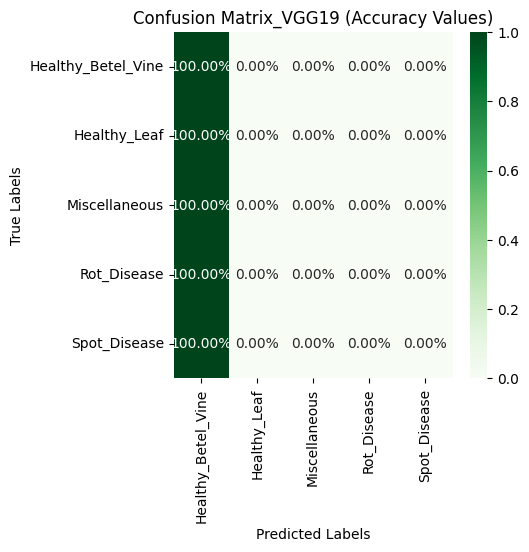

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_dataset.classes, np.argmax(predictions1, axis=1))
accuracy_values = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(4.5, 4.5))
sns.heatmap(accuracy_values, annot=True, fmt=".2%", cmap="Greens", xticklabels=diseases_labels, yticklabels=diseases_labels)
plt.title("Confusion Matrix_VGG19 (Accuracy Values)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
# Classification Report

class_report = classification_report(test_dataset.classes, np.argmax(predictions1, axis=1), target_names=diseases_labels)
print("Classification Report_VGG19:\n", class_report)



Classification Report_VGG19:
                     precision    recall  f1-score   support

Healthy_Betel_Vine       0.25      1.00      0.40        69
      Healthy_Leaf       0.00      0.00      0.00        37
     Miscellaneous       0.00      0.00      0.00        61
       Rot_Disease       0.00      0.00      0.00        57
      Spot_Disease       0.00      0.00      0.00        54

          accuracy                           0.25       278
         macro avg       0.05      0.20      0.08       278
      weighted avg       0.06      0.25      0.10       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


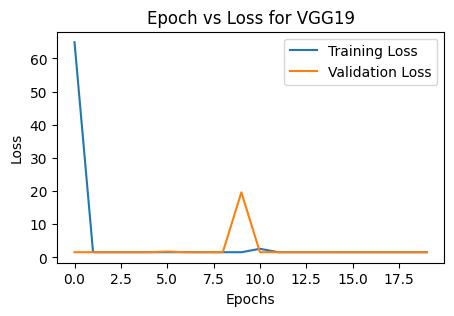

In [ ]:
# Epoch vs Loss graph
plt.figure(figsize=(5, 3))
plt.plot(Info1.history['loss'], label='Training Loss')
plt.plot(Info1.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss for VGG19')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


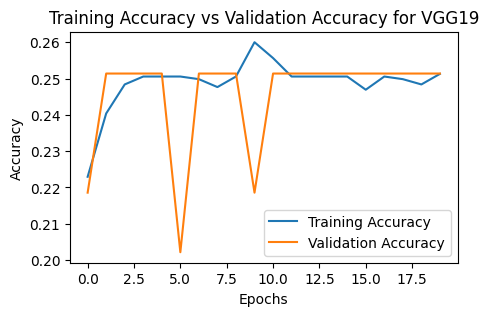

In [ ]:
# Training accuracy Vs Validation accuracy against epoch
plt.figure(figsize=(5, 3))
plt.plot(Info1.history['accuracy'], label='Training Accuracy')
plt.plot(Info1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy for VGG19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

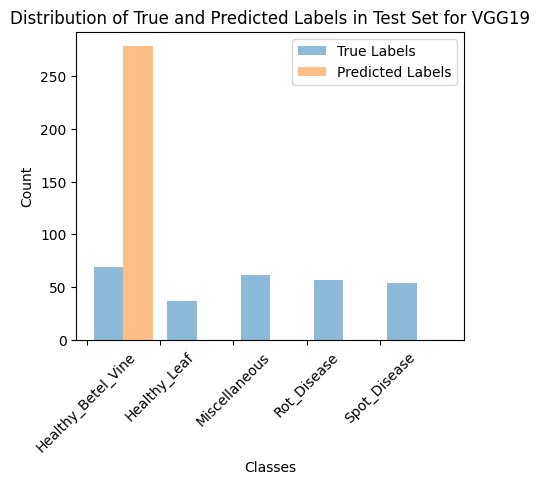

In [ ]:
# Graph of Test Set
test_labels_VGG19 = test_dataset.classes
predicted_labels_VGG19 = np.argmax(predictions1, axis=1)

plt.figure(figsize=(5, 4))
plt.hist([test_labels_VGG19, predicted_labels_VGG19], bins=range(len(diseases_labels) + 1), alpha=0.5, label=['True Labels', 'Predicted Labels'])
plt.xticks(np.arange(len(diseases_labels)), diseases_labels, rotation=45)
plt.title('Distribution of True and Predicted Labels in Test Set for VGG19')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()


<ipython-input-21-3ea343a76924>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!


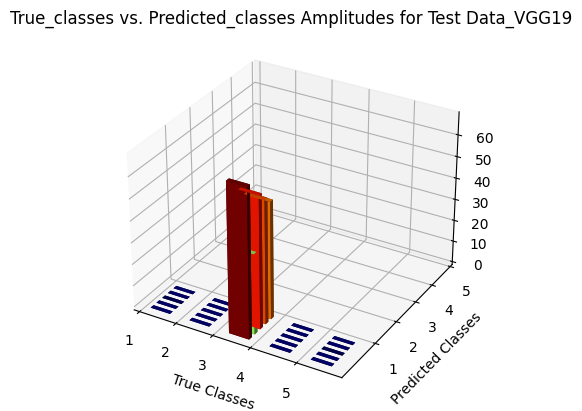

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


xAmplitudes = test_labels_VGG19
yAmplitudes = predicted_labels_VGG19

x = np.array(xAmplitudes)   # Turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure()          # Create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

# Make histogram stuff - set bins
hist, xedges, yedges = np.histogram2d(x, y, bins=(5, 5))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!
max_height = np.max(dz)    # Get range of colorbars so we can normalize
min_height = np.min(dz)
# Scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels for x and y axes
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")

ax.set_xticks([0.5, 2, 3.5, 5,6.8])
ax.set_xticklabels(['1', '2', '3', '4','5'])
ax.set_yticks([1.5, 3.2, 4.8, 6.2, 7.8])
ax.set_yticklabels(['1', '2', '3', '4','5'])


plt.title("True_classes vs. Predicted_classes Amplitudes for Test Data_VGG19")
plt.savefig("Your_title_goes_here")
plt.show()


**VGG 16 Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def VGG_16():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(300, 300, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    return model

# Instantiate the model
vgg16_model = VGG_16()

# Print model summary
vgg16_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 128)       0         
 g2D)                                                   

In [ ]:
LEARNING_RATE=0.001
vgg16_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=['accuracy']

)
Info2 = vgg16_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
)

Epoch 1/20
18/18 [==============================] - 129s 7s/step - loss: 1.8558 - accuracy: 0.2280 - val_loss: 1.5911 - val_accuracy: 0.2514
Epoch 2/20
18/18 [==============================] - 123s 7s/step - loss: 1.5927 - accuracy: 0.2505 - val_loss: 1.5892 - val_accuracy: 0.2514
Epoch 3/20
18/18 [==============================] - 130s 7s/step - loss: 1.5912 - accuracy: 0.2505 - val_loss: 1.5899 - val_accuracy: 0.2514
Epoch 4/20
18/18 [==============================] - 124s 7s/step - loss: 1.5918 - accuracy: 0.2505 - val_loss: 1.5895 - val_accuracy: 0.2514
Epoch 5/20
18/18 [==============================] - 119s 7s/step - loss: 1.5932 - accuracy: 0.2411 - val_loss: 1.5906 - val_accuracy: 0.2514
Epoch 6/20
18/18 [==============================] - 121s 7s/step - loss: 1.6022 - accuracy: 0.2317 - val_loss: 1.5940 - val_accuracy: 0.2514
Epoch 7/20
18/18 [==============================] - 117s 6s/step - loss: 1.5929 - accuracy: 0.2338 - val_loss: 1.5932 - val_accuracy: 0.2186
Epoch 8/20
18

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-26-8d11e21163c1>:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax[i].legend('train','val')


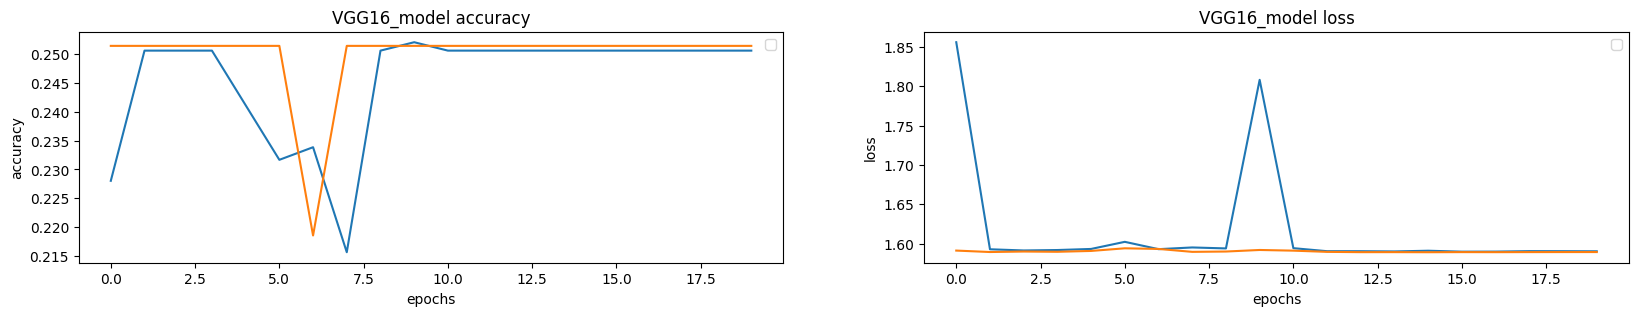

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(20,3))
ax=ax.ravel()

for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(Info2.history[met])
    ax[i].plot(Info2.history['val_'+ met])
    ax[i].set_title('VGG16_model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend('train','val')







In [ ]:
predictions2=vgg16_model.predict(test_dataset)

4/4 [==============================] - 17s 4s/step


In [ ]:
diseases_labels=[]

In [ ]:
for key, value in train_dataset.class_indices.items():
  diseases_labels.append(key)

print(diseases_labels)


['Healthy_Betel_Vine', 'Healthy_Leaf', 'Miscellaneous', 'Rot_Disease', 'Spot_Disease']


In [ ]:
def evaluate(actual, predictions2):
  pre2=[]
  for i in predictions2:
    pre2.append(np.argmax(i))
  accuracy=(pre2==actual).sum()/actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ =precision_recall_fscore_support(actual, pre2, average='macro')
  print(f'precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1score: {f1_score}')





evaluate(test_dataset.classes, predictions2)




Accuracy: 0.24820143884892087
precision: 0.04964028776978417
Recall: 0.2
F1score: 0.07953890489913545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


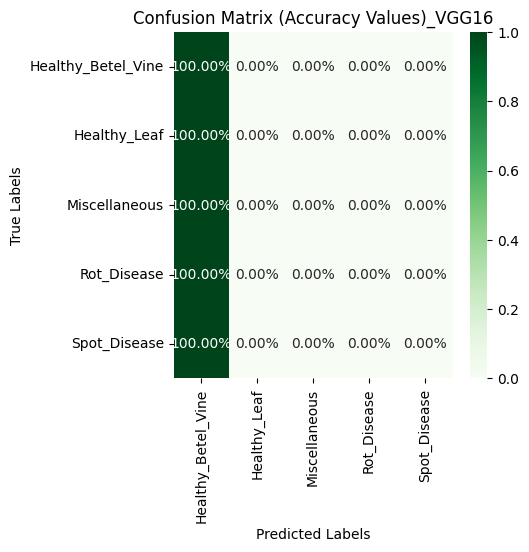

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_dataset.classes, np.argmax(predictions2, axis=1))
accuracy_values = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(4.5, 4.5))
sns.heatmap(accuracy_values, annot=True, fmt=".2%", cmap="Greens", xticklabels=diseases_labels, yticklabels=diseases_labels)
plt.title("Confusion Matrix (Accuracy Values)_VGG16")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
# Classification Report

class_report = classification_report(test_dataset.classes, np.argmax(predictions2, axis=1), target_names=diseases_labels)
print("Classification Report_VGG16:\n", class_report)



Classification Report_VGG16:
                     precision    recall  f1-score   support

Healthy_Betel_Vine       0.25      1.00      0.40        69
      Healthy_Leaf       0.00      0.00      0.00        37
     Miscellaneous       0.00      0.00      0.00        61
       Rot_Disease       0.00      0.00      0.00        57
      Spot_Disease       0.00      0.00      0.00        54

          accuracy                           0.25       278
         macro avg       0.05      0.20      0.08       278
      weighted avg       0.06      0.25      0.10       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


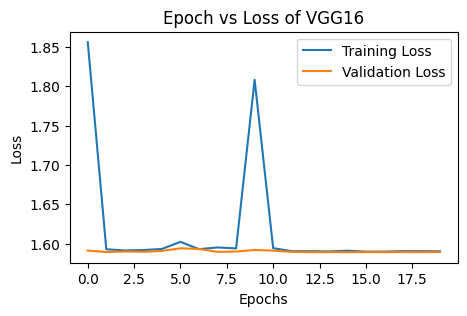

In [ ]:
# Epoch vs Loss graph
plt.figure(figsize=(5, 3))
plt.plot(Info2.history['loss'], label='Training Loss')
plt.plot(Info2.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


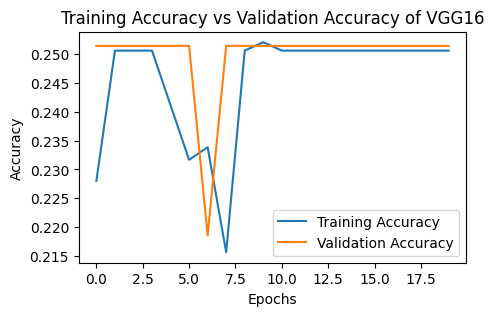

In [ ]:
# Training accuracy Vs Validation accuracy against epoch
plt.figure(figsize=(5, 3))
plt.plot(Info2.history['accuracy'], label='Training Accuracy')
plt.plot(Info2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

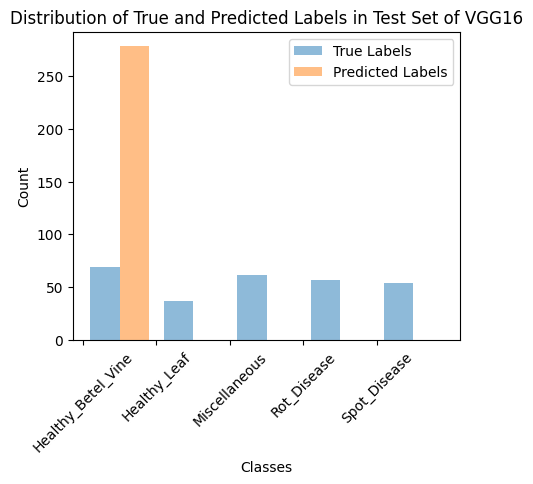

In [ ]:
# Graph of Test Set
test_labels_VGG16 = test_dataset.classes
predicted_labels_VGG16 = np.argmax(predictions2, axis=1)

plt.figure(figsize=(5, 4))
plt.hist([test_labels_VGG16, predicted_labels_VGG16], bins=range(len(diseases_labels) + 1), alpha=0.5, label=['True Labels', 'Predicted Labels'])
plt.xticks(np.arange(len(diseases_labels)), diseases_labels, rotation=45)
plt.title('Distribution of True and Predicted Labels in Test Set of VGG16')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()


<ipython-input-36-3d913e1f9a5b>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!


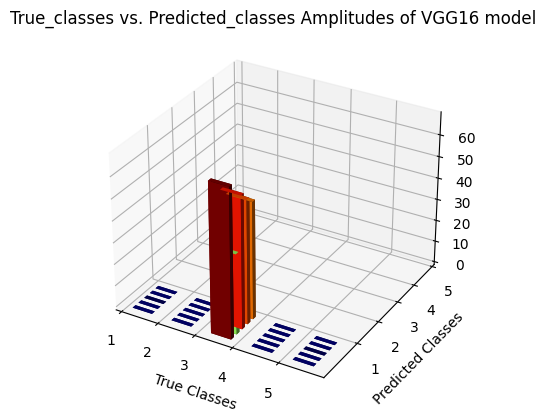

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


xAmplitudes = test_labels_VGG16
yAmplitudes = predicted_labels_VGG16

x = np.array(xAmplitudes)   # Turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure()          # Create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

# Make histogram stuff - set bins
hist, xedges, yedges = np.histogram2d(x, y, bins=(5, 5))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!
max_height = np.max(dz)    # Get range of colorbars so we can normalize
min_height = np.min(dz)
# Scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels for x and y axes
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")

ax.set_xticks([0.5, 2, 3.5, 5,6.8])
ax.set_xticklabels(['1', '2', '3', '4','5'])
ax.set_yticks([1.5, 3.2, 4.8, 6.2, 7.8])
ax.set_yticklabels(['1', '2', '3', '4','5'])


plt.title("True_classes vs. Predicted_classes Amplitudes of VGG16 model")
plt.savefig("Your_title_goes_here")
plt.show()


**BLCNN model**

In [ ]:
from keras.models import Sequential
from keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
BLCNN_model = Sequential()

# Add separable convolutional layers
BLCNN_model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
BLCNN_model.add(BatchNormalization())
BLCNN_model.add(MaxPooling2D(pool_size=(2, 2)))
BLCNN_model.add(Dropout(0.5))


BLCNN_model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu'))
BLCNN_model.add(BatchNormalization())
BLCNN_model.add(MaxPooling2D(pool_size=(2, 2)))
BLCNN_model.add(Dropout(0.5))


BLCNN_model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu'))
BLCNN_model.add(BatchNormalization())
BLCNN_model.add(MaxPooling2D(pool_size=(2, 2)))
BLCNN_model.add(Dropout(0.5))

# Flatten layer
BLCNN_model.add(Flatten())

# Add Dense layers
BLCNN_model.add(Dense(128, activation='relu'))
BLCNN_model.add(BatchNormalization())
BLCNN_model.add(Dense(5, activation='softmax'))  # Assuming num_classes is the number of output classes

# Print model summary
BLCNN_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 298, 298, 32)      155       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 298, 298, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 149, 149, 32)      0         
                                                                 
 separable_conv2d_1 (Separa  (None, 147, 147, 64)      2400      
 bleConv2D)                                           

In [ ]:
LEARNING_RATE=0.001
BLCNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=['accuracy']

)
Info3 = BLCNN_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
)

Epoch 1/20
18/18 [==============================] - 128s 7s/step - loss: 0.7892 - accuracy: 0.6761 - val_loss: 3.5074 - val_accuracy: 0.2295
Epoch 2/20
18/18 [==============================] - 116s 6s/step - loss: 0.4533 - accuracy: 0.8184 - val_loss: 6.8025 - val_accuracy: 0.2514
Epoch 3/20
18/18 [==============================] - 102s 6s/step - loss: 0.3217 - accuracy: 0.8954 - val_loss: 12.0308 - val_accuracy: 0.2514
Epoch 4/20
18/18 [==============================] - 127s 7s/step - loss: 0.2820 - accuracy: 0.9041 - val_loss: 20.4827 - val_accuracy: 0.2514
Epoch 5/20
18/18 [==============================] - 115s 6s/step - loss: 0.2519 - accuracy: 0.9143 - val_loss: 29.6892 - val_accuracy: 0.2514
Epoch 6/20
18/18 [==============================] - 121s 7s/step - loss: 0.2395 - accuracy: 0.9121 - val_loss: 43.3912 - val_accuracy: 0.2514
Epoch 7/20
18/18 [==============================] - 107s 6s/step - loss: 0.2403 - accuracy: 0.9223 - val_loss: 62.5409 - val_accuracy: 0.2514
Epoch 8/

In [ ]:
import matplotlib.pyplot as plt

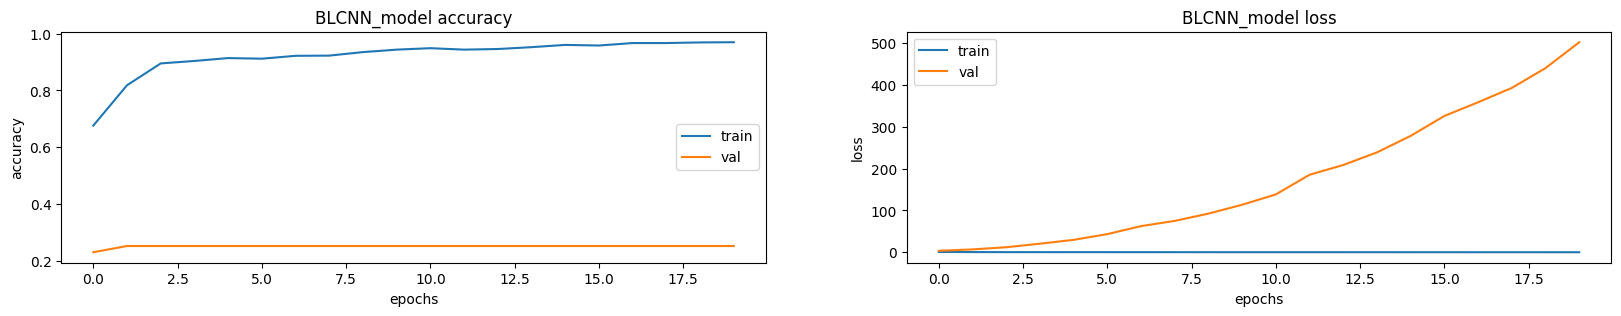

In [ ]:


fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(Info3.history[met])
    ax[i].plot(Info3.history['val_' + met])
    ax[i].set_title('BLCNN_model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])  # Corrected the legend function

plt.show()


In [ ]:
predictions3=BLCNN_model.predict(test_dataset)

4/4 [==============================] - 20s 4s/step


In [ ]:
diseases_labels=[]

In [ ]:
for key, value in train_dataset.class_indices.items():
  diseases_labels.append(key)

print(diseases_labels)


['Healthy_Betel_Vine', 'Healthy_Leaf', 'Miscellaneous', 'Rot_Disease', 'Spot_Disease']


In [ ]:
def evaluate(actual, predictions3):
  pre3=[]
  for i in predictions3:
    pre3.append(np.argmax(i))
  accuracy=(pre3==actual).sum()/actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ =precision_recall_fscore_support(actual, pre3, average='macro')
  print(f'precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1score: {f1_score}')



evaluate(test_dataset.classes, predictions3)



Accuracy: 0.24820143884892087
precision: 0.04964028776978417
Recall: 0.2
F1score: 0.07953890489913545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


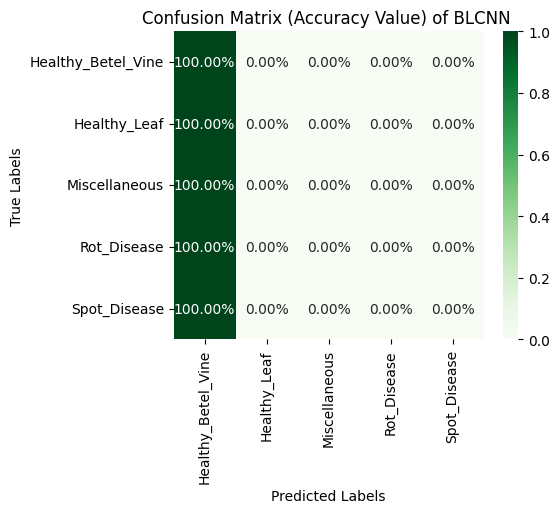

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_dataset.classes, np.argmax(predictions3, axis=1))
accuracy_values = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 4))
sns.heatmap(accuracy_values, annot=True, fmt=".2%", cmap="Greens", xticklabels=diseases_labels, yticklabels=diseases_labels)
plt.title("Confusion Matrix (Accuracy Value) of BLCNN ")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
# Classification Report

class_report = classification_report(test_dataset.classes, np.argmax(predictions3, axis=1), target_names=diseases_labels)
print("Classification Report of BLCNN:\n", class_report)



Classification Report of BLCNN:
                     precision    recall  f1-score   support

Healthy_Betel_Vine       0.25      1.00      0.40        69
      Healthy_Leaf       0.00      0.00      0.00        37
     Miscellaneous       0.00      0.00      0.00        61
       Rot_Disease       0.00      0.00      0.00        57
      Spot_Disease       0.00      0.00      0.00        54

          accuracy                           0.25       278
         macro avg       0.05      0.20      0.08       278
      weighted avg       0.06      0.25      0.10       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


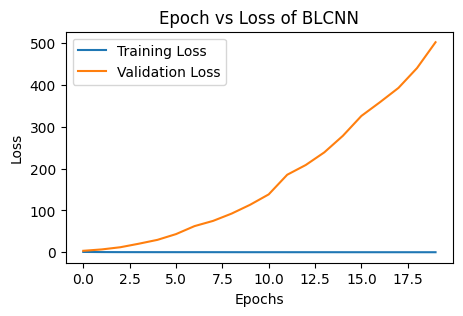

In [ ]:
# Epoch vs Loss graph
plt.figure(figsize=(5, 3))
plt.plot(Info3.history['loss'], label='Training Loss')
plt.plot(Info3.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss of BLCNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


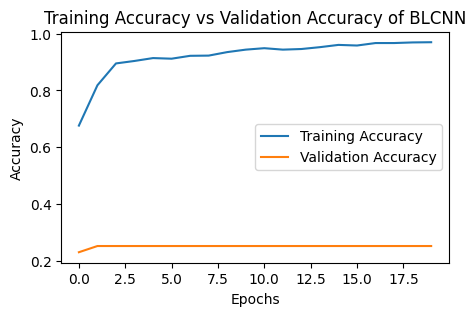

In [ ]:
# Training accuracy Vs Validation accuracy against epoch
plt.figure(figsize=(5, 3))
plt.plot(Info3.history['accuracy'], label='Training Accuracy')
plt.plot(Info3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy of BLCNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

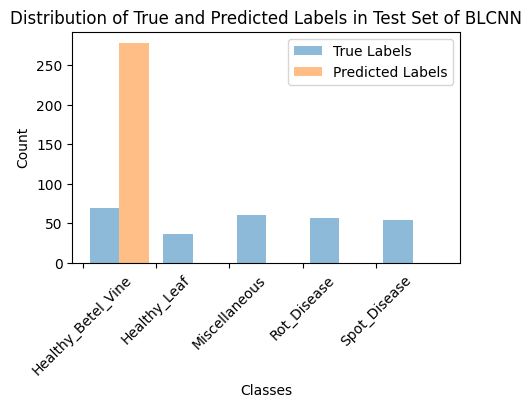

In [ ]:
# Graph of Test Set
test_labels_BLCNN = test_dataset.classes
predicted_labels_BLCNN = np.argmax(predictions3, axis=1)

plt.figure(figsize=(5, 3))
plt.hist([test_labels_BLCNN, predicted_labels_BLCNN], bins=range(len(diseases_labels) + 1), alpha=0.5, label=['True Labels', 'Predicted Labels'])
plt.xticks(np.arange(len(diseases_labels)), diseases_labels, rotation=45)
plt.title('Distribution of True and Predicted Labels in Test Set of BLCNN')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()


<ipython-input-50-5dffb713813d>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!


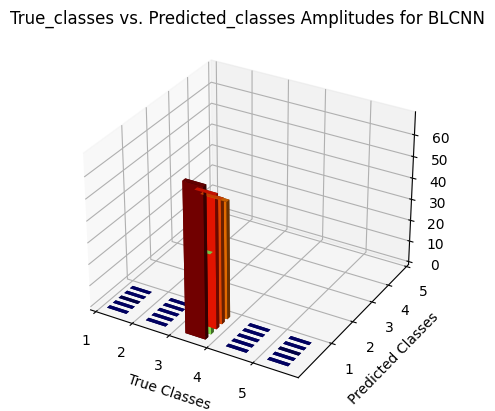

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


xAmplitudes = test_labels_BLCNN
yAmplitudes = predicted_labels_BLCNN

x = np.array(xAmplitudes)   # Turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure()          # Create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

# Make histogram stuff - set bins
hist, xedges, yedges = np.histogram2d(x, y, bins=(5, 5))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!
max_height = np.max(dz)    # Get range of colorbars so we can normalize
min_height = np.min(dz)
# Scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels for x and y axes
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")

ax.set_xticks([0.5, 2, 3.5, 5,6.8])
ax.set_xticklabels(['1', '2', '3', '4','5'])
ax.set_yticks([1.5, 3.2, 4.8, 6.2, 7.8])
ax.set_yticklabels(['1', '2', '3', '4','5'])


plt.title("True_classes vs. Predicted_classes Amplitudes for BLCNN")
plt.savefig("Your_title_goes_here")
plt.show()


**BetelNet-10**

This is my own customised model named betelnet 10. It's accuracy is more satisfactory than others.




In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras import Sequential

def BetelNet10_model(input_shape=train_dataset.image_shape, classes=5):
    model = Sequential()

    model.add(Conv2D(32, (1, 1), activation="relu",input_shape=input_shape))
    model.add(MaxPool2D(2))

    model.add(Conv2D(32, (1, 1), activation="relu"))
    model.add(MaxPool2D(2))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPool2D(2))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPool2D(2))

    model.add(Conv2D(128, (5, 5), activation="relu"))
    model.add(MaxPool2D(1))

    model.add(Conv2D(128, (5, 5), activation="relu"))
    model.add(MaxPool2D(1))

    model.add(Conv2D(256, (7, 7), activation="relu"))
    model.add(MaxPool2D(1))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation="softmax"))

    return model

BetelNet10 = BetelNet10_model()
BetelNet10.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 300, 300, 32)      128       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 150, 150, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      1056      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)       

In [ ]:
LEARNING_RATE=0.001
BetelNet10.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=['accuracy']

)
Info4 = BetelNet10.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
)

Epoch 1/20
18/18 [==============================] - 129s 7s/step - loss: 1.5046 - accuracy: 0.2840 - val_loss: 1.2306 - val_accuracy: 0.3825
Epoch 2/20
18/18 [==============================] - 108s 6s/step - loss: 1.0553 - accuracy: 0.4568 - val_loss: 1.0003 - val_accuracy: 0.4372
Epoch 3/20
18/18 [==============================] - 108s 6s/step - loss: 0.9373 - accuracy: 0.4895 - val_loss: 0.8756 - val_accuracy: 0.5410
Epoch 4/20
18/18 [==============================] - 101s 6s/step - loss: 0.8031 - accuracy: 0.5832 - val_loss: 0.6209 - val_accuracy: 0.6284
Epoch 5/20
18/18 [==============================] - 113s 6s/step - loss: 0.6024 - accuracy: 0.6761 - val_loss: 0.4053 - val_accuracy: 0.7650
Epoch 6/20
18/18 [==============================] - 114s 6s/step - loss: 0.4664 - accuracy: 0.7603 - val_loss: 0.3088 - val_accuracy: 0.7705
Epoch 7/20
18/18 [==============================] - 115s 6s/step - loss: 0.5476 - accuracy: 0.7357 - val_loss: 0.4186 - val_accuracy: 0.7705
Epoch 8/20
18

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-54-4529776ef17f>:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax[i].legend('train','val')


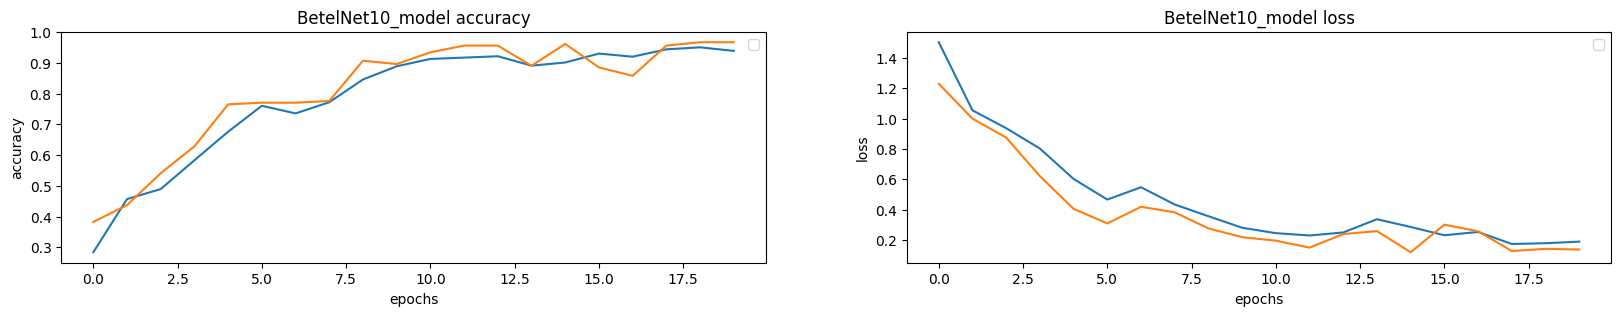

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(20,3))
ax=ax.ravel()

for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(Info4.history[met])
    ax[i].plot(Info4.history['val_'+ met])
    ax[i].set_title('BetelNet10_model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend('train','val')







In [ ]:
predictions4=BetelNet10.predict(test_dataset)

4/4 [==============================] - 19s 4s/step


In [ ]:
diseases_labels=[]

In [ ]:
for key, value in train_dataset.class_indices.items():
  diseases_labels.append(key)

print(diseases_labels)


['Healthy_Betel_Vine', 'Healthy_Leaf', 'Miscellaneous', 'Rot_Disease', 'Spot_Disease']


In [ ]:
def evaluate(actual, predictions4):
  pre4=[]
  for i in predictions4:
    pre4.append(np.argmax(i))
  accuracy=(pre4==actual).sum()/actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ =precision_recall_fscore_support(actual, pre4, average='macro')
  print(f'precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1score: {f1_score}')





evaluate(test_dataset.classes, predictions4)




Accuracy: 0.9244604316546763
precision: 0.9444155844155844
Recall: 0.936623580101841
F1score: 0.9316763602338792


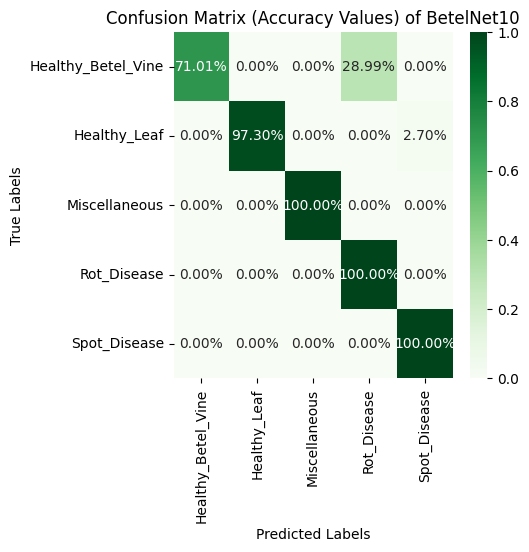

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_dataset.classes, np.argmax(predictions4, axis=1))
accuracy_values = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(4.5, 4.5))
sns.heatmap(accuracy_values, annot=True, fmt=".2%", cmap="Greens", xticklabels=diseases_labels, yticklabels=diseases_labels)
plt.title("Confusion Matrix (Accuracy Values) of BetelNet10")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
# Classification Report

class_report = classification_report(test_dataset.classes, np.argmax(predictions4, axis=1), target_names=diseases_labels)
print("Classification Report_BetelNet10:\n", class_report)



Classification Report_BetelNet10:
                     precision    recall  f1-score   support

Healthy_Betel_Vine       1.00      0.71      0.83        69
      Healthy_Leaf       1.00      0.97      0.99        37
     Miscellaneous       1.00      1.00      1.00        61
       Rot_Disease       0.74      1.00      0.85        57
      Spot_Disease       0.98      1.00      0.99        54

          accuracy                           0.92       278
         macro avg       0.94      0.94      0.93       278
      weighted avg       0.94      0.92      0.92       278



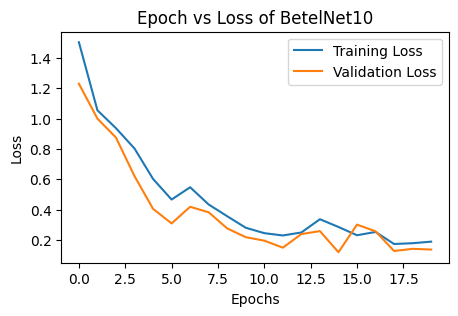

In [ ]:
# Epoch vs Loss graph
plt.figure(figsize=(5, 3))
plt.plot(Info4.history['loss'], label='Training Loss')
plt.plot(Info4.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss of BetelNet10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


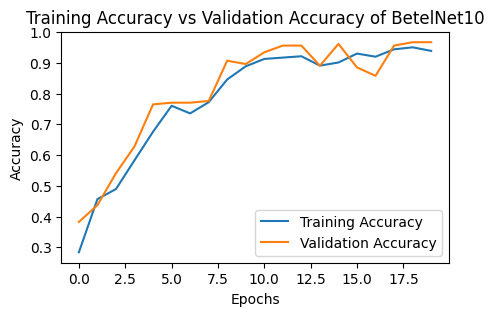

In [ ]:
# Training accuracy Vs Validation accuracy against epoch
plt.figure(figsize=(5, 3))
plt.plot(Info4.history['accuracy'], label='Training Accuracy')
plt.plot(Info4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy of BetelNet10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

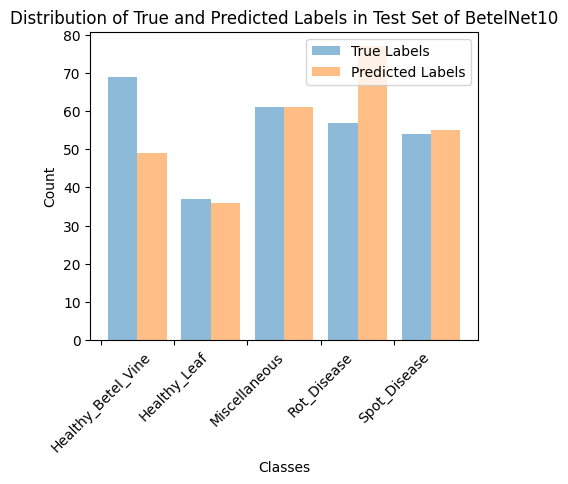

In [ ]:
# Graph of Test Set
test_labels_BetelNet10 = test_dataset.classes
predicted_labels_BetelNet10 = np.argmax(predictions4, axis=1)

plt.figure(figsize=(5, 4))
plt.hist([test_labels_BetelNet10, predicted_labels_BetelNet10], bins=range(len(diseases_labels) + 1), alpha=0.5, label=['True Labels', 'Predicted Labels'])
plt.xticks(np.arange(len(diseases_labels)), diseases_labels, rotation=45)
plt.title('Distribution of True and Predicted Labels in Test Set of BetelNet10')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()


<ipython-input-64-116ad3595da3>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!


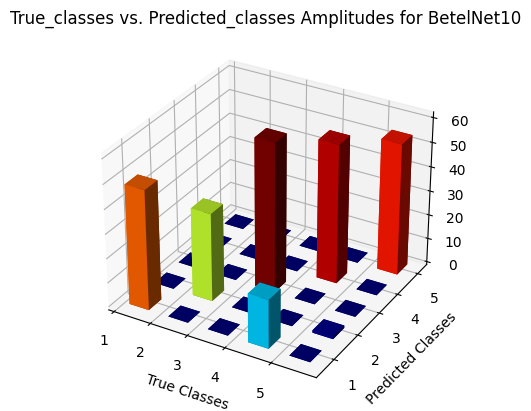

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


xAmplitudes = test_labels_BetelNet10
yAmplitudes = predicted_labels_BetelNet10

x = np.array(xAmplitudes)   # Turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure()          # Create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

# Make histogram stuff - set bins
hist, xedges, yedges = np.histogram2d(x, y, bins=(5, 5))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')  # Get desired colormap - you can change this!
max_height = np.max(dz)    # Get range of colorbars so we can normalize
min_height = np.min(dz)
# Scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels for x and y axes
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")

ax.set_xticks([0.5, 2, 3.5, 5,6.8])
ax.set_xticklabels(['1', '2', '3', '4','5'])
ax.set_yticks([1.5, 3.2, 4.8, 6.2, 7.8])
ax.set_yticklabels(['1', '2', '3', '4','5'])


plt.title("True_classes vs. Predicted_classes Amplitudes for BetelNet10")
plt.savefig("Your_title_goes_here")
plt.show()


**ROC Curve**

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC

models = [
    ("RidgeClassifier_model1", VGG19_model),
    ("RidgeClassifier_model2", VGG16_model),
    ("RidgeClassifier_model3", BLCNN_model),
    ("RidgeClassifier_model4", BetelNet10)
]

# Iterate through each model
for model_name, model in models:
    visualizer = ROCAUC(model, classes=["win", "loss", "draw"], title=f"ROCAUC Curve - {model_name}")
    visualizer.score(test_dataset, test_dataset.classes)
    visualizer.show()


NameError: name 'VGG19_model' is not defined